In [429]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/googleplaystore.csv


# 1. Dataset


We will be using a public data set in Kaggle in csv format. This Dataset is Google Play Store Apps.

To import the dataset to the current environment do the following steps:

Click "+ Add Data" in the top right corner of this Kaggle notebook.
Search "Google Play" in the search box.
Click Add on the first record (uploaded by Lavanda Gupta).
There will be a new folder in /kaggle/input/ containing the dataset.
Jupyter Magic Commands: You can execute linux shell commands in this notebook by preceding the command with '!' character.

to list files in the current directory you can execute in a cell:

!ls -la

In [430]:
!pwd

/kaggle/working


## Importing libraries

In [431]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 2. Acquire data

In [432]:
# First challenge: Try to read the csv files and store them in 2 diferent dataframes dataframe
df_reviews = pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
df_apps = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")



# 3. Intro: Wrangle, prepare, cleanse the data.

## Explore data

We will be focusing on the Apps dataset, leaving the Reviews one for the more advanced training

In [433]:
# Visualizing first 5 rows of the dataset
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [434]:
# Try to visualize now 10 rows instead
df_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [435]:
# Dimensions of the apps dataframe: 13 columns, 10841 samples
df_apps.shape

(10841, 13)

In [436]:
# Types of each column
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [437]:
# Statistics of the dataframe. Only numerical columns are taken into account
df_apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [438]:
# To list all the colums
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [439]:
# if we want to rename a column df_apps.rename(columns={'App':'App Name'}, inplace=True)


It's often useful to delete (drop) the columns that we are not going to use. We free up memory and also analytical complexity.

df_apps = df_apps.drop("Genres", axis=1)

In [440]:
df_apps = df_apps.drop("Genres", axis=1)

df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up


In [441]:
#Let's drop for instance the version of the app, which for our analysis is not going to be useful.
#df_apps = df_apps.drop("Current Ver", axis=1)
df_apps = df_apps.drop("Android Ver", axis=1)
#df_apps = df_apps.drop("Genres", axis=1)

#The axis parameter determines whether we are dropping a column (1) or a row (0). 0 is default.

# This is equivalent to use the parameter inplace = True. In this way it will get saved in the dataframe directly
# df_apps.drop("Current Ver", axis=1, inplace=True)

In [442]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1


In [443]:
# How many unique values has Category column have?
df_apps.Category.nunique()

34

In [444]:
#List the unique values for Category
df_apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [445]:
#Alternative way to refer to a Pandas Series
df_apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [446]:
# If we want to see all the rows that comply with certain condition, we can use loc
df_apps.loc[df_apps.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19,4.0 and up


In [447]:
# Another example
df_apps.loc[df_apps.Type == 'Free']
#df_apps.loc[df_apps.Rating == ':19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,"July 25, 2017",1.48
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,"July 6, 2018",1.0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,"January 20, 2017",1.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,"January 19, 2015",Varies with device


In [448]:
df_apps['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [449]:
# We can also select certain rows with iloc
df_apps.iloc[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1


In [450]:
# Use iloc too select row 10472
df_apps.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Name: 10472, dtype: object

In [451]:
#We need to drop this sample as it's clearly corrupted.
df_apps = df_apps.drop(10472).reset_index().drop("index", axis=1)

In [452]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 11 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
dtypes: float64(1), object(10)
memory usage: 931.7+ KB


In [453]:
#Let's identify more corrupt entries with data that we know should not be possible

#First we create the mask
mask = df_apps.Rating < 4
mask

0        False
1         True
2        False
3        False
4        False
         ...  
10835    False
10836    False
10837    False
10838    False
10839    False
Name: Rating, Length: 10840, dtype: bool

In [454]:
df_apps.loc[mask]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,"April 26, 2018",1.1
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,"June 6, 2018",NaN
28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136,4.6M,"10,000+",Free,0,Everyone,"July 12, 2018",6.0
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,"100,000+",Free,0,Everyone,"July 11, 2018",2.1
...,...,...,...,...,...,...,...,...,...,...,...
10781,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,"February 27, 2015",2.22
10818,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,"5,000+",Free,0,Teen,"August 5, 2017",0.3.4
10827,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,"May 15, 2017",2.0.1
10829,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,"January 20, 2014",1.5


In [455]:
# What are all the possible values of Size and Installs?
df_apps['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [456]:
#What percentage of apps are free?
# Your code here

In [457]:
# Let's see what fields are included in the other dataframe
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## 4. Analyze, identify patterns, and explore the data.

### Type

In our previous analysis (and also, because we have phones and apps ourselves) we know there are 2 types of app: Free and Paid. Not many people like to pay for apps, so we also analyzed that there are many more Free apps in the marketplace than paid. Let's visualize it.

In [458]:
df_apps.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0


In [ ]:
df_apps['Last Updated'].value_counts()

In [479]:
df_apps['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [478]:
df_apps['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$74.99         1
$18.99         1
$1.29          1
$89.99         1
$379.99        1
Name: Price, Length: 92, dtype: int64

In [477]:
df_apps['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [476]:
df_apps['Reviews'].value_counts()

0        596
1        272
2        214
3        175
4        137
        ... 
6747       1
9612       1
42644      1
15489      1
8226       1
Name: Reviews, Length: 6001, dtype: int64

In [475]:
df_apps['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
MazeMilitia Classic Multiplayer Shooting Game        1
Snapp                                                1
A/C Air Conditioner Remote                           1
Pixel Z Gunner 3D - Battle Survival Fps              1
DG Surveyor                                          1
Name: App, Length: 9659, dtype: int64

In [474]:
df_apps['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [459]:
df_apps['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [473]:
df_apps['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

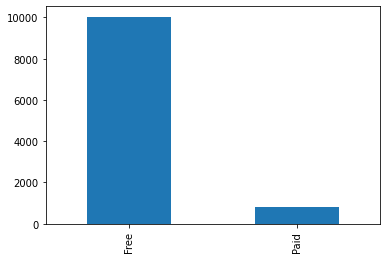

In [460]:
# Let's have a look at the total number of applications that are free vs paid
df_apps['Type'].value_counts().plot(kind="bar")

In [461]:
#Let's also go into the Rating of our apps. We have been tasked to plot the average rating of our apps per each of the categories
#First, let's select the subset of our dataframe that we are interested in.
df_cat_rating = df_apps[['Category','Rating']]
df_cat_rating.head()

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3


In [462]:
df_cat_rating

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10835,FAMILY,4.5
10836,FAMILY,5.0
10837,MEDICAL,NaN
10838,BOOKS_AND_REFERENCE,4.5


In [463]:
#Now let's calculate the mean for each 
df_rating_per_category = df_cat_rating.groupby('Category').mean()
df_rating_per_category.head(30)

,Rating
Category,
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452
COMICS,4.155172
COMMUNICATION,4.158537
DATING,3.970769
EDUCATION,4.389032


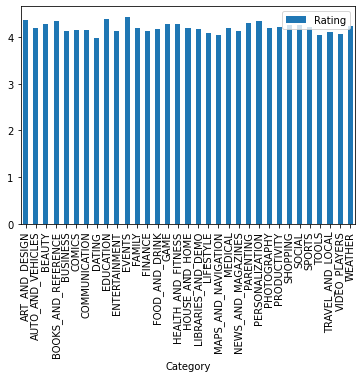

In [464]:
#Let's plot it now to see what's the result
df_rating_per_category.plot(kind='bar')

What issue(s) do we see in this visualization?

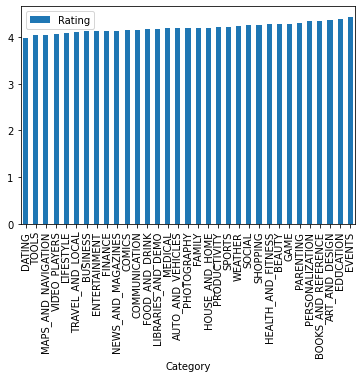

In [465]:
# Let's improve the plot
df_rating_per_category_ordered = df_rating_per_category.sort_values("Rating")
df_rating_per_category_ordered.plot(kind="bar")
'''Still we have some issues.:
      1.- Most apps' ratings range from around 3.8 to 4.8.
      2.- The chart itself is very squished. We need more space. ''';

(3.5, 5.0)

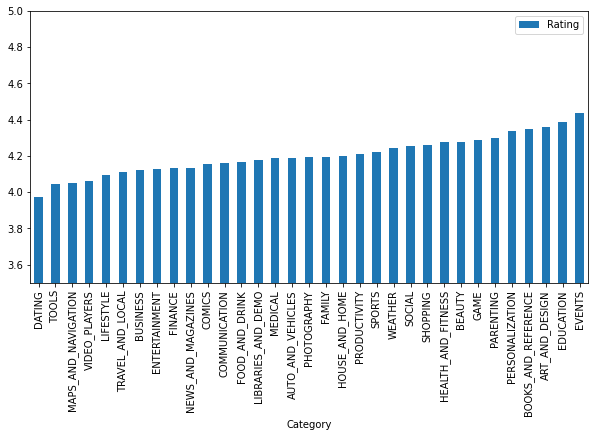

In [466]:
# And even some more adjustements:
ax1 = df_rating_per_category_ordered.plot(kind='bar', figsize=(10,5))
ax1.set_ylim(3.5,5)

Let's see a different type of plot: the line plot.

In [467]:
#Casting into datetime
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'])
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 11 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Last Updated      10840 non-null datetime64[ns]
Current Ver       10832 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 931.7+ KB


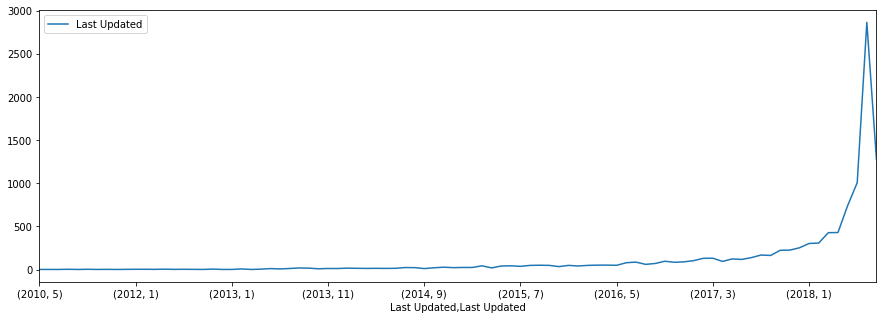

In [468]:
#Example of a lineplot. We see that the apps in our dataset were updated usually by a few months of the collection of the data (end of the lineplot)

df_apps[['Last Updated']].groupby([df_apps['Last Updated'].dt.year, df_apps['Last Updated'].dt.month]).count().plot(kind='line', figsize=(15, 5))


## 5. Data transformations.

In [469]:
#Let's focus in the size of the app. If we are going to use this data in the future or quantify the size somehow, we need to do some arrangements.
df_apps[['Size']].head(15)

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
5,5.6M
6,19M
7,29M
8,33M
9,3.1M


In [470]:
df_apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [471]:
#Let's simply cast it into an integer, and it should be fine.
df_apps.astype({'Size':'int32'})

ValueError: invalid literal for int() with base 10: '19M'

In [ ]:
#... right? As we saw up there, we need to do some arrangements.
# First, we need to make our strings 'look like' numbers.

#We present you guys with the fuction apply:
df_apps['Size'] = df_apps['Size'].apply(size_to_int)

In [ ]:
def size_to_int(n):
    lastchar = n[-1:]
    if 'M' == lastchar:
        n = float(n[:-1])*1000
    elif 'k' == lastchar:
        n = float(n[:-1])
    else:
        n = None
    return n

In [ ]:
df_apps

In [ ]:
df_apps.info()

In [ ]:
#We can see how the average size of apps has increased consistently with the years.

df_apps[['Last Updated', 'Size']]\
    .groupby([df_apps['Last Updated'].dt.year, df_apps['Last Updated'].dt.month]).mean()\
    .plot(kind='line', figsize=(15, 5))


In [ ]:
#We should check if we have duplicates in our dataset and get rid of them.
duplicated_mask = df_apps.duplicated()
df_apps[duplicated_mask]

In [ ]:
df_apps[df_apps['App']=='TickTick: To Do List with Reminder, Day Planner']

In [ ]:
#Let's drop the duplicates
df_apps = df_apps.drop_duplicates()

In [ ]:
df_apps.head()

In [ ]:
df_apps.info()